In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#data cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stops = stopwords.words('english')
nltk.download('punkt')
import tensorflow  as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

import gzip

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [4]:
beauty_df = getDF('/content/drive/MyDrive/DS and ML/Data/reviews_Beauty_5.json.gz')

In [5]:
grocery_df = getDF('/content/drive/MyDrive/DS and ML/Data/reviews_Grocery_and_Gourmet_Food_5.json.gz')
home_df = getDF('/content/drive/MyDrive/DS and ML/Data/reviews_Home_and_Kitchen_5.json.gz')
office_df = getDF('/content/drive/MyDrive/DS and ML/Data/reviews_Office_Products_5.json.gz')
pet_df = getDF('/content/drive/MyDrive/DS and ML/Data/reviews_Pet_Supplies_5.json.gz')

In [6]:
# beauty = 0, grocery =1 , home = 2 , office = 3 , pet = 4

In [7]:
beauty_df = beauty_df[['reviewText']]
beauty_df['category'] = 0

grocery_df = grocery_df[['reviewText']]
grocery_df['category'] = 1

home_df = home_df[['reviewText']]
home_df['category'] = 2

office_df = office_df[['reviewText']]
office_df['category'] = 3

pet_df = pet_df[['reviewText']]
pet_df['category'] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [8]:
beauty_df

,reviewText,category
0,Very oily and creamy. Not at all what I expect...,0
1,This palette was a decent price and I was look...,0
2,The texture of this concealer pallet is fantas...,0
3,I really can't tell what exactly this thing is...,0
4,"It was a little smaller than I expected, but t...",0
...,...,...
198497,Just a little dab of this shea butter should b...,0
198498,This shea butter is completely raw and unrefin...,0
198499,The skin is the body's largest organ and it ab...,0
198500,I have very dry elbows and knees. I have a to...,0


In [9]:
df = pd.concat([beauty_df,grocery_df,home_df,office_df,pet_df])

In [10]:
df

,reviewText,category
0,Very oily and creamy. Not at all what I expect...,0
1,This palette was a decent price and I was look...,0
2,The texture of this concealer pallet is fantas...,0
3,I really can't tell what exactly this thing is...,0
4,"It was a little smaller than I expected, but t...",0
...,...,...
157831,The Pet Magasin Retractable Dog Leash is the b...,4
157832,I'm not the biggest fan of retractable leashes...,4
157833,I was provided a leash for my unbiased review....,4
157834,This is a well designed leash that offers the ...,4


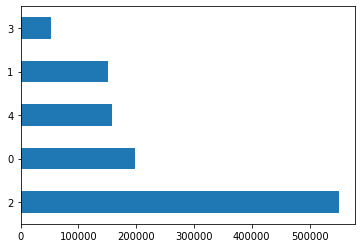

In [11]:
df.category.value_counts().plot(kind='barh')

In [12]:
df.category.value_counts().median()

157836.0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(1111847, 2)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(1111847, 2)

In [17]:
df = df.groupby('category').head(150000)

In [18]:
df

,reviewText,category
0,Very oily and creamy. Not at all what I expect...,0
1,This palette was a decent price and I was look...,0
2,The texture of this concealer pallet is fantas...,0
3,I really can't tell what exactly this thing is...,0
4,"It was a little smaller than I expected, but t...",0
...,...,...
150151,"I'm really glad I bought these, but just know ...",4
150152,Not much to say about these really. They are ...,4
150153,I have three dogs of various sizes and these p...,4
150154,What can I say good poop bags to pick up my do...,4


In [19]:
# data cleaning 

In [20]:
def clean(text):
  text = text.lower()
  text = re.sub('http\S+',' ',text)
  text = re.sub('\.+',' ',text)
  text = re.sub('[^a-z]',' ',text)
  word_tokens = word_tokenize(text)
  imp_words = [words for words in word_tokens if words not in stops]

  return ' '.join(imp_words)

In [21]:
clean('https://colab.research. google .com/drive/1cPQkAYAPocV_qrYot_ qdRX1AYnJxVh7s#sc rollTo=V Uc5tOF lVe59 ')

'google com drive cpqkayapocv qryot qdrx aynjxvh sc rollto v uc tof lve'

In [22]:
df['cleaned_text'] = df['reviewText'].apply(lambda x : clean(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,reviewText,category,cleaned_text
0,Very oily and creamy. Not at all what I expect...,0,oily creamy expected ordered try highlight con...
1,This palette was a decent price and I was look...,0,palette decent price looking different shades ...
2,The texture of this concealer pallet is fantas...,0,texture concealer pallet fantastic great cover...
3,I really can't tell what exactly this thing is...,0,really tell exactly thing powder kind oil ish ...
4,"It was a little smaller than I expected, but t...",0,little smaller expected okay lasted long time ...


In [24]:
df = df[['cleaned_text','category']]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df['cleaned_text'],df['category'],test_size=0.2,random_state=30)

In [27]:
x_train

49439     dogs like snuggle little high senior dog get s...
121786    though would less orange compare creams sold u...
143027    use black lab pounds picked one breast collar ...
129948    love many brushes receive price brushes soft f...
51962     well cheap construction premium bought expensi...
                                ...                        
46401     small collection sharpies always looking uniqu...
28611     everything ordered looked good units packed go...
67352     picture pet carrier justice really well made l...
69179     always fan super pet products rats love kabobs...
131969    dimension challenged want know small great pep...
Name: cleaned_text, Length: 522586, dtype: object

In [28]:
y_train

49439     4
121786    0
143027    4
129948    0
51962     3
         ..
46401     3
28611     2
67352     4
69179     4
131969    2
Name: category, Length: 522586, dtype: int64

In [29]:
x_train

dtype('O')

In [32]:
tokenizer = Tokenizer(oov_token='<unk>')

In [33]:
tokenizer.fit_on_texts(x_train)

In [54]:
word_index = tokenizer.word_index


In [36]:
len(tokenizer.word_index)

156579

In [37]:
vocab_size = 156579+1

(array([268534., 190491.,  86717.,  43746.,  23908.,  13871.,   8177.,
          5245.,   3446.,   2383.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

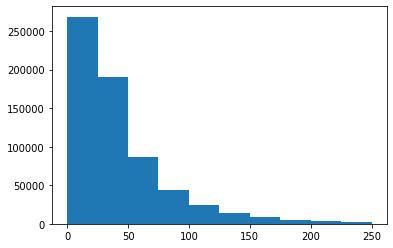

In [44]:
plt.hist(df['cleaned_text'].apply(lambda x : len(x.split())),range=(0,250))

In [46]:
max_length = 120
embedding_dimension = 300
padding_type = 'post'
truncating_type = 'post'

In [47]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)

In [57]:
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [50]:
x_train_sequences[0]

[101, 2, 7803, 16, 122, 3527, 24, 10, 54, 16132, 154]

In [55]:
word_index['red']

308

In [58]:
train_padded = pad_sequences(x_train_sequences,maxlen= max_length,padding= padding_type,truncating=truncating_type)
test_padded = pad_sequences(x_test_sequences,maxlen= max_length,padding= padding_type,truncating=truncating_type)

In [59]:
# model Building

In [63]:
lstm_model = tf.keras.Sequential([ 
                                  
                                  tf.keras.layers.Embedding(vocab_size,embedding_dimension),
                                  tf.keras.layers.LSTM(128),
                                  tf.keras.layers.Dense(20,activation= 'relu'),
                                  tf.keras.layers.Dense(5,activation='softmax')

])

In [65]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         46974000  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 20)                2580      
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 47,196,333
Trainable params: 47,196,333
Non-trainable params: 0
_________________________________________________________________


In [66]:
lstm_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
history = lstm_model.fit(train_padded,y_train,epochs=5,validation_data=(test_padded,y_test),batch_size=1000)

Epoch 1/5
523/523 [==============================] - 2210s 4s/step - loss: 1.3952 - accuracy: 0.3456 - val_loss: 1.4586 - val_accuracy: 0.3429
Epoch 2/5
523/523 [==============================] - 2197s 4s/step - loss: 1.1513 - accuracy: 0.4867 - val_loss: 0.6912 - val_accuracy: 0.7688
Epoch 3/5
523/523 [==============================] - 2201s 4s/step - loss: 0.3317 - accuracy: 0.8952 - val_loss: 0.1834 - val_accuracy: 0.9422
Epoch 4/5
523/523 [==============================] - 2256s 4s/step - loss: 0.1401 - accuracy: 0.9558 - val_loss: 0.1602 - val_accuracy: 0.9480
Epoch 5/5
523/523 [==============================] - 2251s 4s/step - loss: 0.1058 - accuracy: 0.9663 - val_loss: 0.1616 - val_accuracy: 0.9475


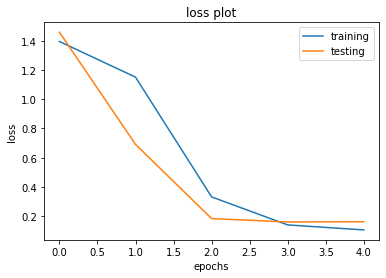

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training','testing'])

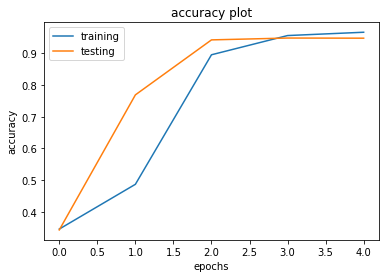

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])